In [2]:
!pip install matplotlib
!pip install seaborn
!pip install plotly.express

  iso_code continent     location      date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  31/12/19          NaN        0.0   
1      AFG      Asia  Afghanistan  01/01/20          NaN        0.0   
2      AFG      Asia  Afghanistan  02/01/20          NaN        0.0   
3      AFG      Asia  Afghanistan  03/01/20          NaN        0.0   
4      AFG      Asia  Afghanistan  04/01/20          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987              NaN               

<ipython-input-8-54a2d522d471>:16: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



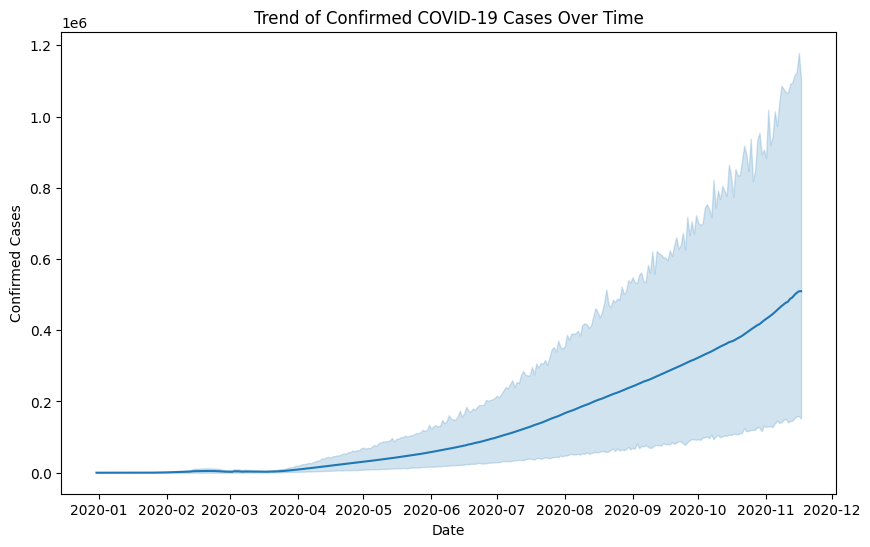

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency infor

RMSE: 3715139.6214019037


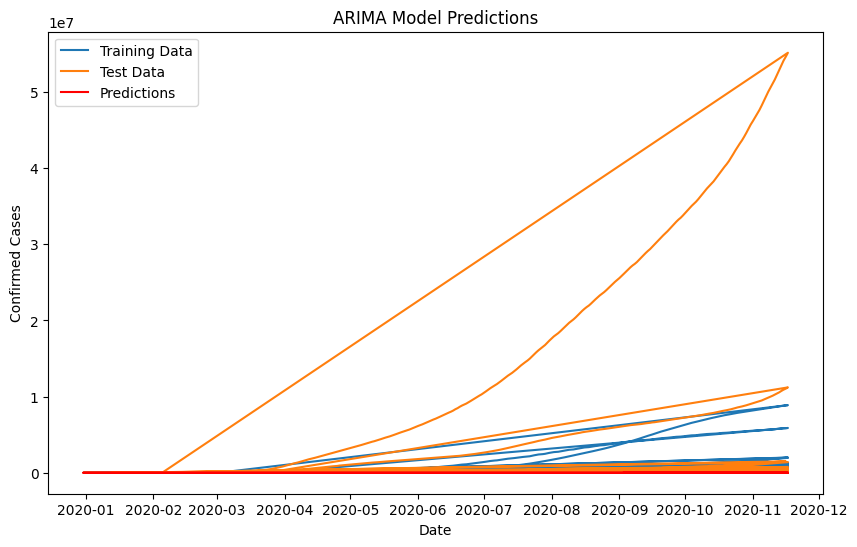

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


data_url = 'https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv'
df = pd.read_csv(data_url)

print(df.head())
print(df.columns)

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y', infer_datetime_format=True)

print(df.isnull().sum())

if 'total_cases' not in df.columns:
    raise ValueError("The column 'total_cases' does not exist in the dataframe.")

plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='total_cases', data=df)
plt.title('Trend of Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

data = df[['date', 'total_cases']].dropna()
data.set_index('date', inplace=True)
train = data[:int(0.8*len(data))]
test = data[int(0.8*len(data)):]

model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()
predictions = model_fit.forecast(steps=len(test))

error = mean_squared_error(test, predictions)
print(f'RMSE: {np.sqrt(error)}')

plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()

fig = px.line(data.reset_index(), x='date', y='total_cases', title='COVID-19 Cases Over Time')
fig.show()
